In [72]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

X=[]
Y=[]
df=pd.read_csv("dataset_ts.csv",sep=",")
X=df.iloc[:,1:63]
X=X.to_numpy()
Y=df.iloc[:,0]
Y=Y.to_numpy()
df.astype("object").describe()

,label,date,minute,s0,s1,s2,s3,s4,s5,s6,...,s50,s51,s52,s53,s54,s55,s56,s57,s58,s59
count,632,632,632,632,632,632,632,632,632,632,...,632,632,632,632,632,632,632,632,632,632
unique,2,3,632,41,48,46,46,42,41,39,...,43,46,47,46,43,43,41,49,42,42
top,DDOS_N,20/02/2018,14,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,541,541,1,525,500,498,509,523,513,501,...,528,504,502,514,501,518,505,507,508,501


In [31]:
YT=[]
for y in Y:
    if y=="DDOS_S":
        YT.append([0,1])
    else:
        YT.append([1,0])
YT=np.asarray(YT)
print(X.shape,YT.shape)

(632, 62) (632, 2)


In [32]:
df.astype(object).describe().T

,count,unique,top,freq
label,632,2,DDOS_N,541
date,632,3,20/02/2018,541
minute,632,632,14,1
s0,632,41,0,525
s1,632,48,0,500
...,...,...,...,...
s55,632,43,0,518
s56,632,41,0,505
s57,632,49,0,507
s58,632,42,0,508


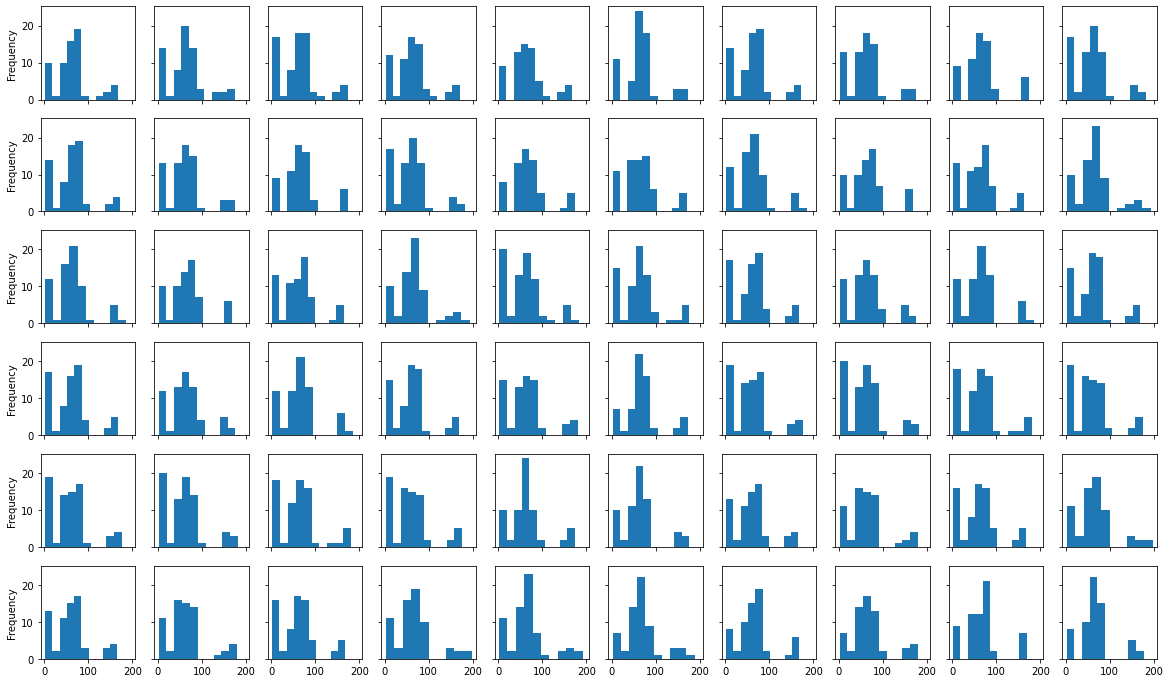

In [33]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(6,10,sharey=True,sharex=True)
fig.set_size_inches(20, 12)
for i in range(6):
    for j in range(10):
        segundo="s"+str(i*6+j)
        df[segundo][df[segundo]>1].plot.hist(ax=axes[i][j])


In [34]:
df.groupby("label")["minute"].agg("count")

label
DDOS_N    541
DDOS_S     91
Name: minute, dtype: int64

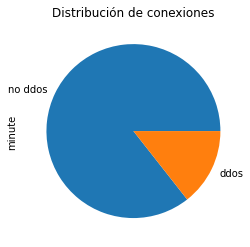

In [35]:
df.groupby("label")["minute"].\
agg("count").plot.pie(title="Distribución de conexiones",
            labels=["no ddos","ddos"]);

In [36]:
seed=12122008
base_x_train, base_x_val, y_train, y_val = train_test_split(
            X, YT, test_size=0.2, stratify=YT, random_state=seed)

In [37]:
x_train=base_x_train[:,2:62]
x_val=base_x_val[:,2:62]
pd.DataFrame(base_x_train).to_csv("base_x_train.csv",index=False,header=False,sep="\t")
pd.DataFrame(base_x_val).to_csv("base_x_val.csv",index=False,header=False,sep="\t")

In [38]:
pd.DataFrame(x_train).to_csv("x_train.csv",index=False,header=False,sep="\t")
pd.DataFrame(y_train).to_csv("y_train.csv",index=False,header=False,sep="\t")
pd.DataFrame(x_val).to_csv("x_val.csv",index=False,header=False,sep="\t")
pd.DataFrame(y_val).to_csv("y_val.csv",index=False,header=False,sep="\t")

In [39]:
X_d=df[df["label"]=="DDOS_S"].to_numpy()
X_nd=df[df["label"]=="DDOS_N"].to_numpy()

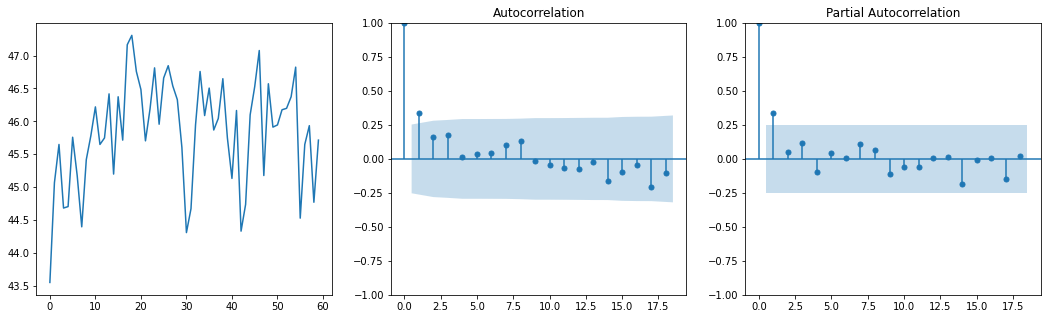

In [40]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

fig, axes = plt.subplots(1,3)
fig.set_size_inches(18, 5)
axes[0].plot([x for x in range(60)],np.mean(X_d[:,3:63],axis=0))
plot_acf(np.mean(X_d[:,3:63],axis=0),ax=axes[1]);
plot_pacf(np.mean(X_d[:,3:63],axis=0),method="ywm",ax=axes[2]);


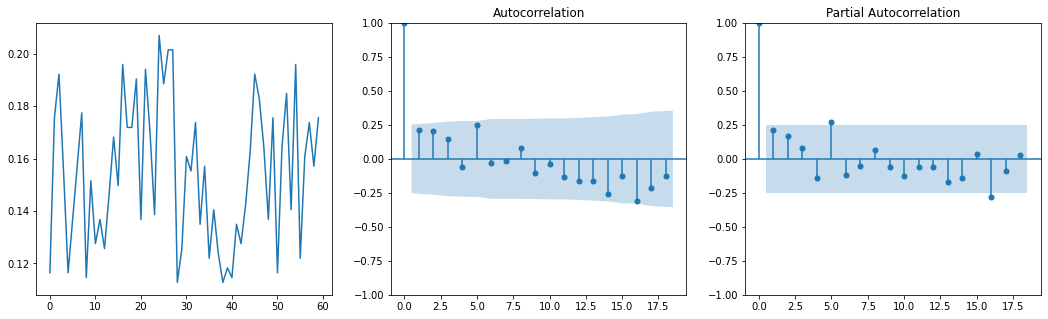

In [41]:
fig, axes = plt.subplots(1,3)
fig.set_size_inches(18, 5)
axes[0].plot([x for x in range(60)],np.mean(X_nd[:,3:63],axis=0))
plot_acf(np.mean(X_nd[:,3:63],axis=0),ax=axes[1]);
plot_pacf(np.mean(X_nd[:,3:63],axis=0),method="ywm",ax=axes[2]);


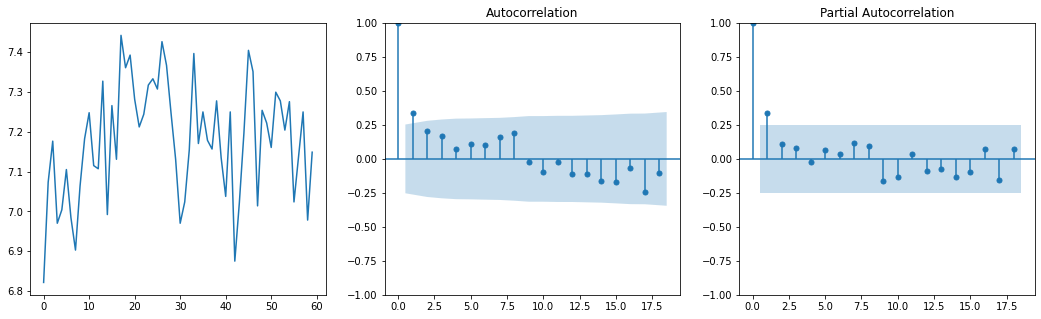

In [42]:
fig, axes = plt.subplots(1,3)
fig.set_size_inches(18, 5)
axes[0].plot([x for x in range(60)],np.mean(x_train,axis=0))
plot_acf(np.mean(x_train,axis=0),ax=axes[1]);
plot_pacf(np.mean(x_train,axis=0),method="ywm",ax=axes[2]);

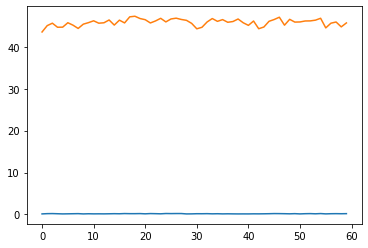

In [43]:
plt.plot([x for x in range(60)],np.mean(X_nd[:,3:63],axis=0))
plt.plot([x for x in range(60)],np.mean(X_d[:,3:63],axis=0))

In [44]:
df_nd_lag=pd.DataFrame(X_nd[:,3:63],dtype=int)
df_d_lag=pd.DataFrame(X_d[:,3:63],dtype=int)
df_lag=pd.DataFrame(x_train,dtype=int)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

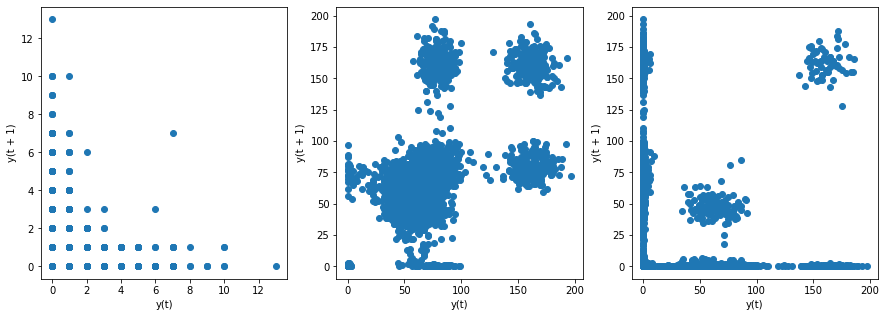

In [45]:
fig, axes = plt.subplots(1,3)
fig.set_size_inches(15, 5)
pd.plotting.lag_plot(df_nd_lag, lag=1,ax=axes[0])
pd.plotting.lag_plot(df_d_lag, lag=1,ax=axes[1])
pd.plotting.lag_plot(df_lag, lag=1,ax=axes[2])


In [75]:
import statsmodels.api as sm
acf=np.asarray(sm.tsa.stattools.ccf(np.mean(x_train,axis=0), np.mean(x_train,axis=0), adjusted=False))
print(acf)
print(acf.shape)

[ 1.00000000e+00  3.36048813e-01  2.08511171e-01  1.71811456e-01
  7.48482350e-02  1.06945841e-01  9.88822444e-02  1.63488171e-01
  1.89012909e-01 -2.00255945e-02 -9.70815068e-02 -2.12269459e-02
 -1.10118047e-01 -1.11738352e-01 -1.61420575e-01 -1.72087026e-01
 -6.45088386e-02 -2.43149674e-01 -1.07161813e-01 -1.71661059e-01
 -1.78367561e-01 -1.50412632e-01 -1.30993092e-01 -1.24932208e-01
 -5.15657070e-02 -5.55105287e-02  1.24945826e-02  1.96685040e-02
  1.51737302e-01  1.52016332e-02  4.87264694e-03  4.04678785e-02
 -5.53926832e-02 -2.72415969e-03  5.27867465e-04  6.23057530e-02
  1.08383167e-01 -1.14452951e-02 -9.78335544e-02  1.85262798e-02
 -6.17973535e-03 -5.30235383e-02  1.96240014e-02 -5.59151412e-03
  7.64483175e-03 -1.70427376e-01 -7.74136633e-02  2.35463674e-02
 -4.87435157e-02 -1.41468418e-02 -6.62822141e-03 -9.34366927e-04
  3.27631333e-02 -3.41827521e-03  1.84030248e-03  8.37223777e-02
  1.01961702e-02 -4.18397238e-03  5.89123238e-02  8.06391147e-03]
(60,)


In [46]:
df_lag = pd.concat([df_lag,
                    df_lag.shift(periods=1,fill_value=1),
                    df_lag.shift(periods=2,fill_value=1),
                    df_lag.shift(periods=3,fill_value=1)], 
                    axis=1)
df_lag.corr()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,1.000000,0.986697,0.983581,0.987943,0.988738,0.980106,0.983863,0.983428,0.989587,0.983326,...,0.014789,0.005550,0.011801,0.024817,0.017536,0.019677,0.016566,0.012226,0.013615,0.018455
1,0.986697,1.000000,0.986351,0.991430,0.989408,0.980352,0.982236,0.982479,0.987904,0.985739,...,0.007347,-0.001912,0.004042,0.018899,0.010694,0.012380,0.008736,0.003435,0.005385,0.011388
2,0.983581,0.986351,1.000000,0.987595,0.984733,0.982803,0.980773,0.986664,0.989128,0.984356,...,0.005677,-0.002500,0.002892,0.017737,0.011608,0.011197,0.008963,0.004072,0.004763,0.011415
3,0.987943,0.991430,0.987595,1.000000,0.990343,0.986365,0.985790,0.984804,0.991643,0.990127,...,0.013016,0.004332,0.009978,0.025081,0.017996,0.018954,0.016067,0.010829,0.012253,0.018590
4,0.988738,0.989408,0.984733,0.990343,1.000000,0.987302,0.989744,0.983953,0.991645,0.987680,...,0.010705,0.002223,0.007245,0.020562,0.013575,0.016112,0.013071,0.007714,0.009457,0.014921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,0.019677,0.012380,0.011197,0.018954,0.016112,0.026185,0.025040,0.024587,0.019953,0.015234,...,0.990797,0.990528,0.990555,0.988376,0.991478,1.000000,0.990077,0.990904,0.994144,0.989501
56,0.016566,0.008736,0.008963,0.016067,0.013071,0.023125,0.022462,0.022084,0.017098,0.012524,...,0.990192,0.993254,0.992605,0.986135,0.991657,0.990077,1.000000,0.990876,0.990511,0.983935
57,0.012226,0.003435,0.004072,0.010829,0.007714,0.017863,0.016948,0.017659,0.011874,0.006994,...,0.989586,0.991067,0.990551,0.987188,0.991186,0.990904,0.990876,1.000000,0.990041,0.989502
58,0.013615,0.005385,0.004763,0.012253,0.009457,0.019709,0.018448,0.018062,0.013308,0.008532,...,0.987828,0.989062,0.991705,0.989818,0.991253,0.994144,0.990511,0.990041,1.000000,0.987929


In [70]:
from statsmodels.tsa.stattools import adfuller
for i in range(60):
    result = adfuller(x_train[i,:])
    if(result[0]>0.05):
        print('ADF Statistic: %f' % result[0])
        print('p-value: %f' % result[1])
        print('Critical Values:')
        for key, value in result[4].items():
            print('\t%s: %.3f' % (key, value))

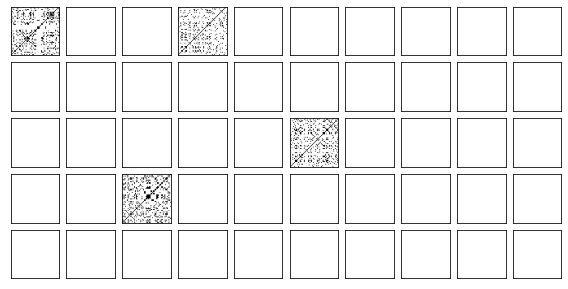

In [52]:
from mpl_toolkits.axes_grid1 import ImageGrid
from pyts.image import RecurrencePlot

rp = RecurrencePlot(threshold='point', percentage=20)
X_rp = rp.fit_transform(x_train)

# Plot the 50 recurrence plots
fig = plt.figure(figsize=(10, 5))

grid = ImageGrid(fig, 111, nrows_ncols=(5, 10), axes_pad=0.1, share_all=True)
for i, ax in enumerate(grid):
    ax.imshow(X_rp[i], cmap='binary', origin='lower')
grid[0].get_yaxis().set_ticks([])
grid[0].get_xaxis().set_ticks([])
plt.show()

In [54]:
from pyts.metrics import dtw

x=np.mean(X_nd[:,3:63],axis=0)
y=np.mean(X_d[:,3:63],axis=0)
dtw(x, y, method='sakoechiba', options={'window_size': 0.5})

353.91320456122435

/var/folders/x1/960bftsj63n3p5r_yj461xd00000gn/T/ipykernel_8697/2535038413.py:43: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


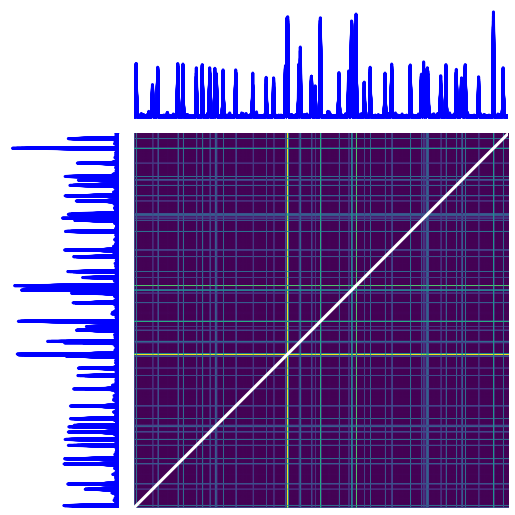

In [58]:
from scipy.spatial.distance import cdist
from tslearn import metrics

x=np.asarray(x_train,dtype=float)
y=np.asarray(x_train,dtype=float)
sz = x.shape[0]

path, sim = metrics.dtw_path(x, y)

plt.figure(1, figsize=(8, 8))

# definitions for the axes
left, bottom = 0.01, 0.1
w_ts = h_ts = 0.2
left_h = left + w_ts + 0.02
width = height = 0.65
bottom_h = bottom + height + 0.02

rect_s_y = [left, bottom, w_ts, height]
rect_gram = [left_h, bottom, width, height]
rect_s_x = [left_h, bottom_h, width, h_ts]

ax_gram = plt.axes(rect_gram)
ax_s_x = plt.axes(rect_s_x)
ax_s_y = plt.axes(rect_s_y)

mat = cdist(x, y)

ax_gram.imshow(mat, origin='lower')
ax_gram.axis("off")
ax_gram.autoscale(False)
ax_gram.plot([j for (i, j) in path], [i for (i, j) in path], "w-",
             linewidth=3.)

ax_s_x.plot(np.arange(sz), y, "b-", linewidth=3.)
ax_s_x.axis("off")
ax_s_x.set_xlim((0, sz - 1))

ax_s_y.plot(- x, np.arange(sz), "b-", linewidth=3.)
ax_s_y.axis("off")
ax_s_y.set_ylim((0, sz - 1))

plt.tight_layout()
plt.show()